In [16]:
include("/Users/simon/Documents/DTU fag/syntese/Code/syntese/coords2index/load_s1slc_ann.jl");
include("/Users/simon/Documents/DTU fag/syntese/Code/syntese/coords2index/load_pod.jl");
include("/Users/simon/Documents/DTU fag/syntese/Code/syntese/structs/SlcRaw.jl");
include("/Users/simon/Documents/DTU fag/syntese/Code/syntese/coords2index/salih2llh.jl");
include("/Users/simon/Documents/DTU fag/syntese/Code/syntese/coords2index/llh2sali.jl");


In [2]:
reflector_heigt = [42.753,43.282,44.475]

3-element Array{Float64,1}:
 42.753
 43.282
 44.475

In [41]:
padding = 2; # to display images

### Reflector in Image 1 15. Marts

In [4]:
path_img1 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.tiff"
path_ann_1 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/annotation/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.xml"
path_pod_1 = "/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170404T111500_V20170314T225942_20170316T005942.EOF"

"/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170404T111500_V20170314T225942_20170316T005942.EOF"

In [5]:
reflector_index_img1 = [[1126,6087],[1123, 6100],[1127, 6111]]

3-element Array{Array{Int64,1},1}:
 [1126, 6087]
 [1123, 6100]
 [1127, 6111]

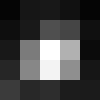

In [33]:
index = reflector_index_img1[1]
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
show_img(load_s1slc_data(path_img1,view))

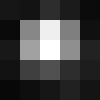

In [34]:
index = reflector_index_img1[2]
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
show_img(load_s1slc_data(path_img1,view))

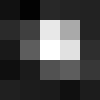

In [35]:
index = reflector_index_img1[3]
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
show_img(load_s1slc_data(path_img1,view))

### Convert to coordinates

In [9]:
salih = hcat(vcat(reflector_index_img1'...),reflector_heigt)

3×3 Array{Float64,2}:
 1126.0  6087.0  42.753
 1123.0  6100.0  43.282
 1127.0  6111.0  44.475

In [12]:
meta_img1 = load_s1slc_ann(path_ann_1);
osv_1,t_sv_1 = load_pod(path_pod_1,meta_img1["t_0"]);

In [18]:
llh_1 = salih2llh(salih, osv_1, t_sv_1, meta_img1)

3×3 Array{Float64,2}:
 56.5619  8.30744  42.7529
 56.5623  8.30682  43.2819
 56.5619  8.30604  44.4749

## Find Indew in image 2  27. Marts

In [20]:
path_img2 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170327T053950_20170327T054018_004890_0088AE_3CC1.SAFE/measurement/s1b-iw3-slc-vv-20170327t053950-20170327t054018-004890-0088ae-006.tiff"
path_ann_2 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170327T053950_20170327T054018_004890_0088AE_3CC1.SAFE/annotation/s1b-iw3-slc-vv-20170327t053950-20170327t054018-004890-0088ae-006.xml"
path_pod_2 = "/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170416T111343_V20170326T225942_20170328T005942.EOF"

"/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170416T111343_V20170326T225942_20170328T005942.EOF"

In [21]:
meta_img2 = load_s1slc_ann(path_ann_2);
osv_2,t_sv_2 = load_pod(path_pod_2,meta_img2["t_0"]);

In [22]:
reflector_index_img2 = llh2sali(llh_1, osv_2, t_sv_2 ,meta_img2 )

3×2 Array{Float64,2}:
 1126.17  6070.31
 1123.17  6083.31
 1127.17  6094.31

In [28]:
round.(Int,reflector_index_img2)

3×2 Array{Int64,2}:
 1126  6070
 1123  6083
 1127  6094

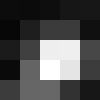

In [36]:
index = round.(Int,reflector_index_img2[1,:])
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
show_img(load_s1slc_data(path_img2,view))

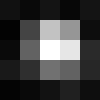

In [39]:
index = round.(Int,reflector_index_img2[2,:])
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
show_img(load_s1slc_data(path_img2,view))

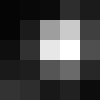

In [40]:
index = round.(Int,reflector_index_img2[3,:])
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
show_img(load_s1slc_data(path_img2,view))